In [1]:
from utils import load_chars_dataset, show_image, load_detection_images, get_label
import numpy as np
import matplotlib.pyplot as plt
import torch
import matplotlib.pyplot as plt
torch.random.manual_seed(0)
import torchvision
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
X, y = load_chars_dataset()

(14224, 400) (400,)


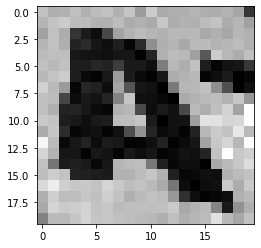

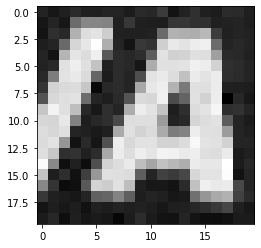

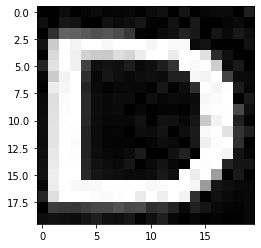

a a d


In [29]:
#i print some images

print(X.shape, X[0].shape)

show_image(X[0])
plt.show()
show_image(X[800])
plt.show()
show_image(X[2500])
plt.show()

#these are their correct labels


print(get_label(y[0]), get_label(y[800]), get_label(y[2500]))


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)
print(neigh.score(X_test, y_test))

0.7493848857644991


In [6]:
nn = MLPClassifier(
    hidden_layer_sizes=(400),
    max_iter=500
)
nn.fit(X_train, y_train)
nn.score(X_test, y_test)


0.886115992970123

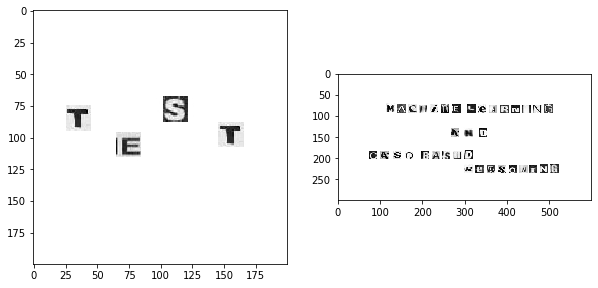

In [7]:
detection_1, detection_2 = load_detection_images()

plt.figure(figsize=(10, 8))
plt.subplot(1,2,1)
plt.imshow(detection_1, cmap="gray")

plt.subplot(1,2,2)
plt.imshow(detection_2, cmap="gray")


In [30]:
def detect_objects(img):
    """
    Finds the letters in the images and puts them and their images in dictionary
    """
    #size of window
    window_size = 20
    #indices were letters start
    objects = {}

    img_H, img_W = img.shape
    #iterate over widht and height of image
    for i in range(img_H - window_size):
        for j in range(img_W - window_size):
            #create window of size of images that we classify
            window = img[i:i+window_size, j:j+window_size].flatten()
            #normalize pixels in image
            window = window = window / np.linalg.norm(window)
            window = np.array([window])
            #perform prediction of contents of image
            prediction = nn.predict_proba(window)
            #Check if the model is confident it has found a letter
            if np.max(prediction) > 0.9999:
                l = get_label(np.argmax(prediction))
                if l not in objects:
                    objects[l] = [(i, j)]
                else:
                    #only a newly found letter if it is more than a window away
                    #from a previously found letter
                    object_allready_recorded = False
                    for o in objects[l]:
                        if abs(o[0] - i) <= 20 and abs(o[1] - j) <= 20:
                            object_allready_recorded = True
                            break
                    if object_allready_recorded == False:
                        objects[l].append((i,j))
                        
                
    return objects

print("img_1")

img_1_objects = detect_objects(detection_1)
print(img_1_objects)

print("img 2")

img_2_objects = detect_objects(detection_2)
print(img_2_objects)
    

img_1
{'s': [(66, 102)], 't': [(73, 22), (86, 142)], 'e': [(95, 64)]}
img 2
{'n': [(67, 300), (75, 409), (209, 471)], 'm': [(69, 115)], 't': [(69, 258), (69, 305), (213, 312), (214, 477), (215, 442)], 'e': [(70, 490), (73, 330), (74, 270), (186, 78), (188, 245)], 'a': [(73, 140), (73, 226), (76, 307), (131, 266), (181, 219), (184, 100), (215, 406)], 'c': [(73, 164), (184, 73)], 'h': [(74, 191)], 'i': [(74, 256), (182, 87), (218, 455)], 'r': [(74, 381), (214, 321)], 'p': [(82, 238), (137, 295)], 's': [(182, 128), (184, 246), (215, 372)], 'd': [(182, 299), (215, 482)], 'l': [(187, 92)], 'j': [(188, 183)]}


t


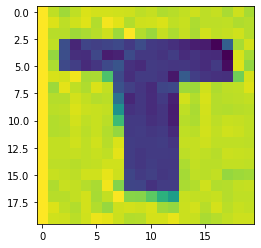

In [15]:
"""
example of taking a window from the image and performing classification on it
"""
window = detection_1[75:95, 25:45]
plt.imshow(window)
window = window.flatten()
window = window = window / np.linalg.norm(window)
window = np.array([window])
l = nn.predict(window)
print(get_label(l[0]))
